In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("dados_bateria.csv", sep=",", encoding="utf-8")

df.head()

df['Condição_String'] = df['Condição'].map({
    0: 'Bateria em Mal Funcionamento',
    1: 'Bateria em Ótimo Funcionamento'
})

df["frequencia"] = df['Frequência de Uso'].map({
    'Baixa': 0,
    'Normal': 1,
    "Alta": 2
})

df["motor temparatura"] = df['Temperatura do Motor'].map({
    'Fria': 0,
    'Normal': 1,
    "Quente": 2
})

df.head()







,Frequência de Uso,Temperatura do Motor,Voltagem da Bateria (V),Temperatura (°C),Condição,Consumo de Energia (kWh),Condição_String,frequencia,motor temparatura
0,Baixa,Normal,11.59,16,Bateria em Mal F...,2.12,NaN,0.0,1
1,Moderada,Normal,11.71,11,Bateria em Mal F...,2.80,NaN,NaN,1
2,Alta,Quente,12.68,19,Bateria em Ótimo...,0.53,NaN,2.0,2
3,Moderada,Normal,12.28,11,Bateria em Mal F...,2.24,NaN,NaN,1
4,Baixa,Normal,12.67,21,Bateria em Ótimo...,1.30,NaN,0.0,1


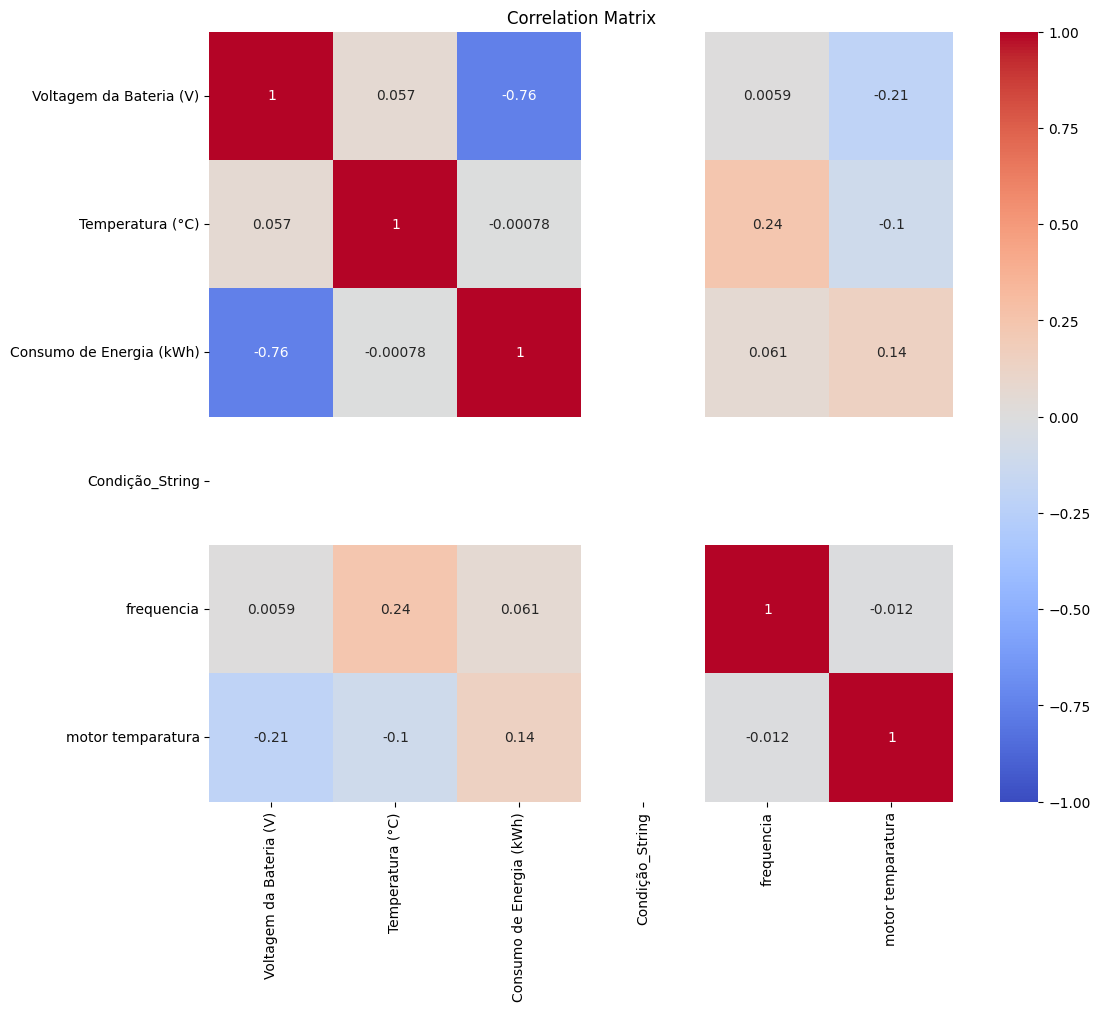

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt



# Criar o mapa de calor da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

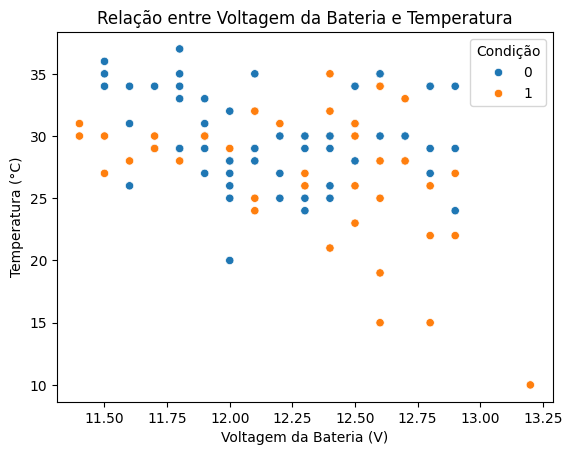

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='Voltagem da Bateria (V)', y='Temperatura (°C)', hue='Condição')
plt.title('Relação entre Voltagem da Bateria e Temperatura')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(columns = ['Condição']) 
y = df['Condição']   

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)



In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()  # Criamos o objeto do classificador (não mudamos nenhum hiperpârametro)

lda.fit(x_train,y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

LinearDiscriminantAnalysis()

In [ ]:
y_predicoes = lda.predict(x_test) 

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

In [ ]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=[0, 1])

<Figure size 1500x500 with 0 Axes>

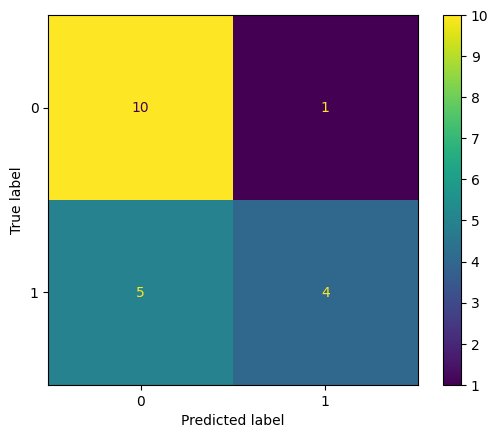

In [ ]:
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=[0,1])
disp.plot(values_format='d') 

In [ ]:
print(classification_report(y_test, y_predicoes))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77        11
           1       0.80      0.44      0.57         9

    accuracy                           0.70        20
   macro avg       0.73      0.68      0.67        20
weighted avg       0.73      0.70      0.68        20

